# Import libraries

The first step is to import the API and connect to your GIS

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from arcgis import GIS
from IPython.display import display

In [2]:
gis = GIS(username='funduck007', password='Ilunl123')

In [49]:
gis.map('57 Essex street, Toronto, Ontario, Canada')

MapView(layout=Layout(height='400px', width='100%'))

# Import parking lot dataset

In [4]:
parking_path = 'Data/parking_lots/compiled06.xls'

In [5]:
parking = pd.read_excel(parking_path)
parking.head()

,LOTID,AREA,SUBAREA,FACILITYCODE,LOTID2004,YEAR,TYPE,CLASS,FLOORS,PRIVATE_RANDOM,...,MONTHLY_RANDOM,MONTHLY_RESERVED,SATURDAY,SUNDAY,HOLIDAY,EVENTS,CONDITION,CONTROL,USER,SURVEY_ADDRESS
0,1010260.0,1.0,1.0,260,1010260,2006.0,1.0,7.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,Tenants,480 Bloor St.
1,1010275.0,1.0,1.0,MERGED WITH 1012570,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1010280.0,1.0,1.0,28,1010280,2006.0,1.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Car Wash,250 Albany Ave.
3,1012570.0,1.0,1.0,2570,1012570,2006.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Wing's food Product,275 Dupont St.
4,1013650.0,1.0,1.0,3650,1013650,2006.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Tenants,16 Howland Ave.


# Plot the top row on the map

In [6]:
parking_lot = parking.loc[0, 'SURVEY_ADDRESS']

In [7]:
format_string = ', Toronto, Ontario, Canada'

In [50]:
gis.map(parking_lot + format_string)

MapView(layout=Layout(height='400px', width='100%'))

# Accessing and creating content

Your GIS can host a [variety of maps, web layers, analytical tools, apps](http://doc.arcgis.com/en/arcgis-online/reference/geo-info.htm) and [individual files](http://doc.arcgis.com/en/arcgis-online/share-maps/supported-items.htm). Using the `gis` module, you can search for, access and manage all your folders, contents and automate such maintenance workflows as scripts.

In this page, we are going to observe how the following can be accomplished:
 * [Searching for content](#searching-for-content)
  * [Wild card search](#wild-card-search)
  * [Searching for content outside your organization](#searching-for-content-outside-your-org)
 * [Creating new content](#creating-new-content)
  * [Publishing an item as a web layer](#publishing-an-item-as-a-web-layer)
  * [Importing data from a pandas dataframe](#importing-data-from-a-pandas-data-frame)
  * [Publishing an empty service](#publishing-an-empty-service)
 * [Organizing content](#organizing-content)
  * [Using folders to organize your contents](#using-folders-to-organize-your-content)

<a id="searching-for-content"></a>
# Searching for content

Accessing the `content` property of your `gis` object returns you an instance of `ContentManager` class. You can use the `search()` method of the `ContentManager` object to search for items on your GIS. You can use the `search()` even if you are connected as an anonymous user, in which case you get to search for public content on ArcGIS Online.

<a id="wild-card-search"></a>
### Wild card search
Search supports usage of wild cards. You can use one asterisk `*` for multiple character wild card search and one question mark `?` for single character.

In [37]:
search_result = gis.content.search(query="title:Toronto*", item_type="Feature layer", outside_org=True)
print(len(search_result), "objects found.")

10 objects found.


<Item title:"TorontoER_ElectionResults" type:Feature Layer Collection owner:mleahy>
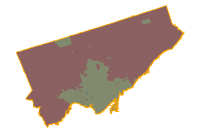

<Item title:"Toronto_Downtown_centre" type:Feature Layer Collection owner:GGRA30H3.wahabza2>

<Item title:"Places of Interest City of Toronto" type:Feature Layer Collection owner:MDhald>
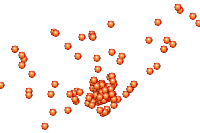

<Item title:"Toronto_Sustainability_Project" type:Feature Layer Collection owner:peter.280>

<Item title:"Places of Interest City of Toronto" type:Feature Layer Collection owner:jbougie_mc_w18>

<Item title:"Places in Toronto" type:Feature Layer Collection owner:Sabahabduljabbar>
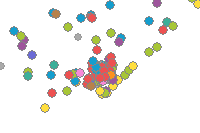

<Item title:"Toronto Wards (BM)" type:Feature Layer Collection owner:BritneyMar>
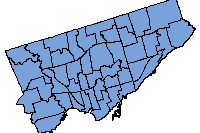

<Item title:"Nearest Schools and hospitals in Greater Toronto Area to LocalBusStops" type:Feature Layer Collection owner:grace.yu2>
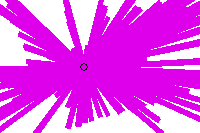

<Item title:"Enriched Toronto Shockwave" type:Feature Layer Collection owner:NicolasPhillips>

<Item title:"Neighborhoods (Toronto)" type:Feature Layer Collection owner:aaron.boda>
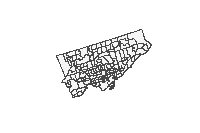

In [38]:
for item in search_result:
    display(item)

Once you know an item's id (called `itemId`), you can access it using the `get()` method instead of searching for it.

In [39]:
# lets get the itemid of first item from previous query
first_item = search_result[0]
known_item_id = first_item.id
print(known_item_id)

d4e70c8b8ab24b88a7cf0b00bff38bad


<Item title:"TorontoER_ElectionResults" type:Feature Layer Collection owner:mleahy>
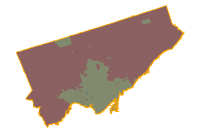

In [40]:
# lets use the get() to access this item
get_item = gis.content.get(known_item_id)
get_item

Let us search for public web scenes visualizing 3D cities. Note, I want to see content that is most popular by number of views to be returned on the top. I am also concerned that if too many items show up, the query might be running slow, hence restrict the results to 15 items.

<Item title:"WorldPop" type:Web Scene owner:holistic_user01>

<Item title:"WorldPop_DMS_Aug31" type:Web Scene owner:holistic_user01>

<Item title:"Cópia de Visualize New Developments por esri_3d" type:Web Scene owner:Educacao@EsriPT>
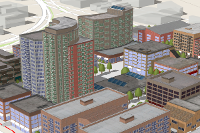

<Item title:"3D Cities - Nederland" type:Web Scene owner:hetrijnlands_admin>
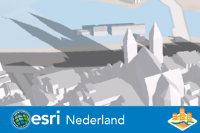

<Item title:"Natural Disasters" type:Web Scene owner:legrantham_uagis>
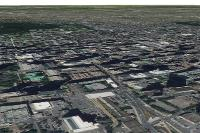

<Item title:"3D Cities - Nederland" type:Web Scene owner:cartesiuslyceum_admin>
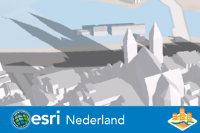

<Item title:"3D Cities - Nederland" type:Web Scene owner:parcivalcollege_admin>
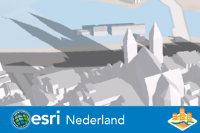

<Item title:"3D Cities - Nederland" type:Web Scene owner:lyceumsanctamaria_admin>
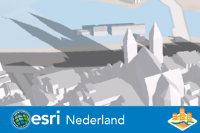

<Item title:"3D Cities - Nederland" type:Web Scene owner:fioretticollegelisse_admin>
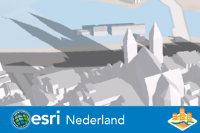

<Item title:"Portland, Oregon" type:Web Scene owner:brittenhamjb>
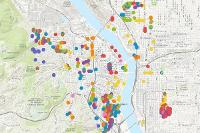

<Item title:"Portland Global Project Scene" type:Web Scene owner:smoran@austincc.edu>
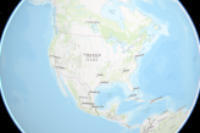

<Item title:"WorldPop_SceneName" type:Web Scene owner:holistic_user05>

<Item title:"3D Cities - Nederland" type:Web Scene owner:openbaarlyceumzeist_admin>
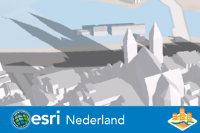

<Item title:"3D Cities - Nederland" type:Web Scene owner:calandlyceum_admin>
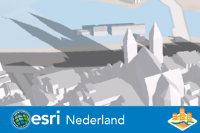

<Item title:"Copy of Visualize New Developments by esri_3d" type:Web Scene owner:Alberto.Gomez_egnos>
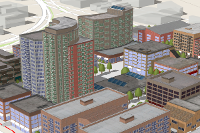

In [41]:
public_3d_city_scenes = gis.content.search(query="3d cities", item_type = "web scene",
                                           sort_field="numViews" ,sort_order="asc",
                                           max_items = 15, outside_org=True)
for item in public_3d_city_scenes:
    display(item)

Thus, you saw how you can apply filters and optional parameters to search for content from other users in different orgs. This collaborative aspect of GIS is quite powerful. You can quickly scale up your projects by leveraging the maps and GIS data shared by other users. You can get ideas on how to visualize or render a particular phenomenon etc. You can do all of this using the API and automate such tasks with ease. For instance, you can build a script to notify you whenever someone shares an item in your topic of interest.

So far, you observed how existing items can be searched and accessed using the `gis` module. Next, let us observe how new content can be created.

<a id="creating-new-content"></a>
## Creating new content

To create new items on your GIS, you use the `add()` method on `ContentManager` object. As earlier, you would not create this object, instead access it from the `content` property of your `GIS` object.

The `add()` method accepts a dictionary containing the properties of the item to be created. The optional `data` parameter accepts a string path to a file. You can use the optional `metadata` parameter to specify an XML file containing metadata information.

All content you add this way is added to the authenticated user's contents. Let us add a csv file and publish it as a feature layer.

In [ ]:
csv_path = r"pathway\to\your_own\CSV\world earthquakes.csv"
csv_properties={'title':'Earthquakes around the world from 1800s to early 1900s',
                'description':'Measurements from globally distributed seismometers',
                'tags':'arcgis, python, earthquake, natural disaster, emergency'}
thumbnail_path = r"pathway\to\your_own\imgs\remote_sensor.png"

earthquake_csv_item = gis.content.add(item_properties=csv_properties, data=csv_path,
                                     thumbnail = thumbnail_path)

**Note**: You can specify most properties of an item as a dictionary to the `item_properties` parameter. Refer to the [API ref doc](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.html#arcgis.gis.ContentManager.add) of this method for a definitive list. You could also specify an empty dictionary to this parameter, the downside is search cannot index these items efficiently if it does not have sufficient metadata information, hence that is not a good programming practice.

<a id="publishing-an-item-as-a-web-layer"></a>
### Publishing an item as a web layer
In the example above you added a csv item. Items such as csv, service definitions, file geodatabases, shape files and packages such as tile, scene and vector tile can be published into hosted web layers. This is accomplished by calling the `publish()` method on that `Item` object.

The `publish()` method accepts an optional `publish_parameters` dictionary where you can specify certain parameters supported by the [publish REST API](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Publish_Item/02r300000080000000/). However this is optional. The `address_fields` parameter allows you to specify which field in your csv or dataset contains address fields suitable for geocoding.

Let us publish the csv into a web feature layer. This csv contains latitude and longitude coordinates of each point, hence the `address_fields` parameter can be ignored. The `publish()` method returns an `Item` object corresponding to the web layer created.

In [ ]:
earthquake_feature_layer_item = earthquake_csv_item.publish()

<a id="importing-data-from-a-pandas-data-frame"></a>
### Importing data from a pandas data frame

[Pandas](http://pandas.pydata.org) is a popular data analysis library for Python. The data frame object of pandas allows you to store and analyze tabular information with ease. Using the Python API, you can import such data frames as an `arcgis.features.FeatureCollection` object using the `import_data()` method. You can then add that feature collection as an item to your GIS.

There is a limit on the maximum number of records allowed (1,000). Some information on how the limit can be increased can be found [here](https://support.esri.com/en/technical-article/000012383).

For this excercise, a subset with the top 1,000 records from the dataset will be created.

In [45]:
parking_1000 = parking.iloc[:1000]

Now that we have the desired data frame with parking lots, let us import that as a feature collection.

In [46]:
parking_fc = gis.content.import_data(parking_1000)
parking_fc

<FeatureCollection>

Next step is to convert the feature collection to a JSON and add it as a text based item to the GIS.

Note: there was an error in the original script, correct way to convert the feature collection to JSON is outlined [here](https://community.esri.com/thread/222208-feature-collection-json-doesnt-have-layers).

In [54]:
parking_json = json.dumps({"featureCollection": {"layers": [dict(parking_fc.layer)]}}) 

In [55]:
parking_item_properties = {'title': 'Parking lots in Toronto',
                        'description':'Parking lots in Toronto, address and characteristics',
                        'tags': 'parking, teranet',
                        'text':parking_json,
                        'type':'Feature Collection'}
parking_item = gis.content.add(parking_item_properties)
parking_item

<Item title:"Parking lots in Toronto" type:Feature Collection owner:funduck007>

# Users

In [21]:
me = gis.users.me
me

<User username:funduck007>

In [22]:
me.access

'org'

In [23]:
me.storageQuota

2199023255552

In [24]:
me.storageUsage

-1

In [25]:
me.role

'org_admin'